In [1]:
from matplotlib import dates as mdate
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from time import sleep
from IPython.display import clear_output
import numpy as np

In [5]:
# do some basic cleaning of outliers

m = pd.read_csv("../Raw usable data/Anthony/Paddling data - Anthony Optimal - Master.csv")

cdate = m["Elapsed Time (s)"]

print(m)

PhoneAccelZ = m["Phone-Accel-Z"]
PhoneAccelY = m["Phone-Accel-Y"]
PhoneAccelX = m["Phone-Accel-X"]

WatchAccelZ = m["Watch-Accel-Z"]
WatchAccelY = m["Watch-Accel-Y"]
WatchAccelX = m["Watch-Accel-X"]

PhoneGyroZ = m["Phone-Gyro-Z"]
PhoneGyroY = m["Phone-Gyro-Y"]
PhoneGyroX = m["Phone-Gyro-X"]

WatchGyroZ = m["Watch-Gyro-Z"]
WatchGyroY = m["Watch-Gyro-Y"]
WatchGyroX = m["Watch-Gyro-X"]

PhoneMagZ = m["Phone-Mag-Z"]
PhoneMagY = m["Phone-Mag-Y"]
PhoneMagX = m["Phone-Mag-X"]

WatchMagZ = m["Watch-Mag-Z"]
WatchMagY = m["Watch-Mag-Y"]
WatchMagX = m["Watch-Mag-X"]

       Elapsed Time (s)  Phone-Accel-Z  Phone-Accel-Y  Phone-Accel-X  \
0                  0.00      -0.136078       0.974121      -0.138031   
1                  0.01      -0.139664       0.976807      -0.151001   
2                  0.02      -0.144485       0.973175      -0.162064   
3                  0.03      -0.144943       0.973862      -0.162643   
4                  0.04      -0.133865       0.978424      -0.169830   
...                 ...            ...            ...            ...   
10108               NaN            NaN            NaN            NaN   
10109               NaN            NaN            NaN            NaN   
10110               NaN            NaN            NaN            NaN   
10111               NaN            NaN            NaN            NaN   
10112               NaN            NaN            NaN            NaN   

       Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  Phone-Gyro-Z  \
0          -0.719894      -0.540298       0.321075     -0.015515   

In [9]:
startmark = 2000
endmark = 9000

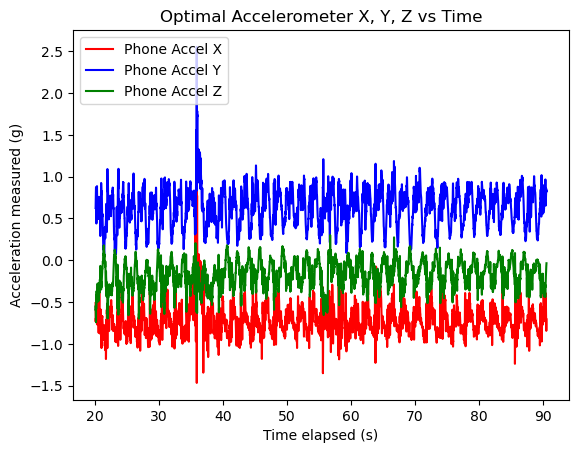

In [10]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], PhoneAccelX[startmark:endmark], "-r", label="Phone Accel X") 
plt.plot(cdate[startmark:endmark], PhoneAccelY[startmark:endmark], "-b", label="Phone Accel Y") 
plt.plot(cdate[startmark:endmark], PhoneAccelZ[startmark:endmark], "-g", label="Phone Accel Z") 

plt.legend(loc="upper left")
plt.show()



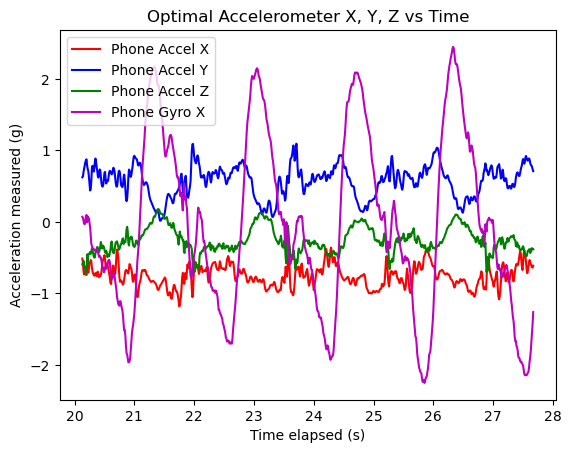

In [11]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")

tl = 750

plt.plot(cdate[startmark:startmark+tl], PhoneAccelX[startmark:startmark+tl], "-r", label="Phone Accel X") 
plt.plot(cdate[startmark:startmark+tl], PhoneAccelY[startmark:startmark+tl], "-b", label="Phone Accel Y") 
plt.plot(cdate[startmark:startmark+tl], PhoneAccelZ[startmark:startmark+tl], "-g", label="Phone Accel Z") 
plt.plot(cdate[startmark:startmark+tl], PhoneGyroX[startmark:startmark+tl], "-m", label="Phone Gyro X") 

plt.legend(loc="upper left")
plt.show()

# use gyro x as an indicator of when to split

In [18]:
splitdf = pd.DataFrame({"timekeeper": [0,0],
                        "Elapsed time (s)": [0,0],
                        "Phone-Accel-Z": [0,0],
                        "Phone-Accel-Y": [0,0],
                        "Phone-Accel-X": [0,0],
                        "Watch-Accel-Z": [0,0],
                        "Watch-Accel-Y": [0,0],
                        "Watch-Accel-X": [0,0],
                        "Phone-Gyro-Z": [0,0],
                        "Phone-Gyro-Y": [0,0],
                        "Phone-Gyro-X": [0,0],
                        "Watch-Gyro-Z": [0,0],
                        "Watch-Gyro-Y": [0,0],
                        "Watch-Gyro-X": [0,0],
                        "Phone-Mag-Z": [0,0],
                        "Phone-Mag-Y": [0,0],
                        "Phone-Mag-X": [0,0],
                        "Watch-Mag-Z": [0,0],
                        "Watch-Mag-Y": [0,0],
                        "Watch-Mag-X": [0,0],
                       })

print(splitdf)

lst = 0
i = startmark
totcount = 0


totalfeatures = []
totallabels = []

currentfeatures = [0,[],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[]]

nf = 0


while (i < endmark):
    indicator = PhoneGyroX[i]
    
    # figure out whether this is a good enough indicator
    nxt = PhoneGyroX[i+1]
        
        
    # make sure it hasnt been triggered in the last 150 iterations
    if (indicator > 1.5 and nxt < indicator and i-lst > 150):
        lst = i
        
        totalfeatures.append(currentfeatures)
        totallabels.append(0) # 0 optimal
        
        nf += 1
        
        currentfeatures = [nf,[],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[],
                   [],[],[]]
        
#         # cut it off, add two blanks
        
#         for j in range(100):
#             splitdf.loc[len(splitdf)] = [totcount,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0,
#                                          0,0,0]
#             totcount += 1
            

    currentfeatures[1].append(PhoneAccelZ[i])
    currentfeatures[2].append(PhoneAccelY[i])
    currentfeatures[3].append(PhoneAccelX[i])
    
    currentfeatures[4].append(WatchAccelZ[i])
    currentfeatures[5].append(WatchAccelY[i])
    currentfeatures[6].append(WatchAccelX[i])
    
    currentfeatures[7].append(PhoneGyroZ[i])
    currentfeatures[8].append(PhoneGyroY[i])
    currentfeatures[9].append(PhoneGyroX[i])
    
    currentfeatures[10].append(WatchGyroZ[i])
    currentfeatures[11].append(WatchGyroY[i])
    currentfeatures[12].append(WatchGyroX[i])
    
    currentfeatures[13].append(PhoneMagZ[i])
    currentfeatures[14].append(PhoneMagY[i])
    currentfeatures[15].append(PhoneMagX[i])
   
    currentfeatures[16].append(WatchMagZ[i])
    currentfeatures[17].append(WatchMagY[i])
    currentfeatures[18].append(WatchMagX[i])
    
    
#     splitdf.loc[len(splitdf)] = [totcount,cdate[i],
#                                  PhoneAccelZ[i], PhoneAccelY[i], PhoneAccelX[i],
#                                  WatchAccelZ[i], WatchAccelY[i], WatchAccelX[i],
#                                  PhoneGyroZ[i], PhoneGyroY[i], PhoneGyroX[i],
#                                  WatchGyroZ[i], WatchGyroY[i], WatchGyroX[i],
#                                  PhoneMagZ[i], PhoneMagY[i], PhoneMagX[i],
#                                  WatchMagZ[i], WatchMagY[i], WatchMagX[i]]
    totcount += 1
    
#     print(splitdf)
    i += 1
    

   timekeeper  Elapsed time (s)  Phone-Accel-Z  Phone-Accel-Y  Phone-Accel-X  \
0           0                 0              0              0              0   
1           0                 0              0              0              0   

   Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  Phone-Gyro-Z  Phone-Gyro-Y  \
0              0              0              0             0             0   
1              0              0              0             0             0   

   Phone-Gyro-X  Watch-Gyro-Z  Watch-Gyro-Y  Watch-Gyro-X  Phone-Mag-Z  \
0             0             0             0             0            0   
1             0             0             0             0            0   

   Phone-Mag-Y  Phone-Mag-X  Watch-Mag-Z  Watch-Mag-Y  Watch-Mag-X  
0            0            0            0            0            0  
1            0            0            0            0            0  


In [19]:
totalfeatures

[[0,
  [-0.5926971436,
   -0.5915374756,
   -0.5438079834,
   -0.599319458,
   -0.6508636475,
   -0.6382141113,
   -0.722076416,
   -0.7423400879,
   -0.454284668,
   -0.5820770264,
   -0.4512481689,
   -0.4465637207,
   -0.4397888184,
   -0.4188537598,
   -0.4470977783,
   -0.4178466797,
   -0.3692474365,
   -0.3867645264,
   -0.4296264648,
   -0.4797363281,
   -0.4984741211,
   -0.4956665039,
   -0.4321136475,
   -0.4044036865,
   -0.3761444092,
   -0.3491363525,
   -0.3654022217,
   -0.4157562256,
   -0.4202270508,
   -0.3878173828,
   -0.3428344727,
   -0.2797088623,
   -0.3149719238,
   -0.371383667,
   -0.3583831787,
   -0.3320617676,
   -0.3522491455,
   -0.388168335,
   -0.4199371338,
   -0.432144165,
   -0.4015350342,
   -0.4331817627,
   -0.4928741455,
   -0.4782714844,
   -0.4557189941,
   -0.4775238037,
   -0.4286346436,
   -0.3921203613,
   -0.3106994629,
   -0.272857666,
   -0.3385467529,
   -0.4188995361,
   -0.4333648682,
   -0.4354553223,
   -0.3915710449,
   -0.321838

In [20]:
totallabels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
import csv

In [22]:
with open('../Trainable data/Anthony/Anthony_Optimal_Training_Data.csv', 'w') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    for j in totalfeatures:
        write.writerow(j)

In [23]:
with open('../Trainable data/Anthony/Anthony_Optimal_Training_Labels.csv', 'w') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerow(totallabels)

In [14]:
splitdf

timekeeper  Elapsed time (s)  Phone-Accel-Z  Phone-Accel-Y  \
0             0.0              0.00       0.000000       0.000000   
1             0.0              0.00       0.000000       0.000000   
2             0.0             20.13      -0.592697       0.624893   
3             1.0             20.14      -0.591537       0.634628   
4             2.0             20.15      -0.543808       0.698395   
...           ...               ...            ...            ...   
10297     10295.0             90.54      -0.097641       0.855637   
10298     10296.0             90.55      -0.072372       0.846130   
10299     10297.0             90.56      -0.057770       0.826248   
10300     10298.0             90.57      -0.039215       0.817398   
10301     10299.0             90.58      -0.035660       0.825073   

       Phone-Accel-X  Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  \
0           0.000000       0.000000       0.000000       0.000000   
1           0.000000       0.000000       0.000000       0.000000   
2          -0.511658      -0.149796       0.266327      -0.941650   
3          -0.571884      -0.151321       0.270203      -0.932663   
4          -0.686066      -0.150558       0.277267      -0.921555   
...              ...            ...            ...            ...   
10297      -0.806732      -0.995163      -0.177536      -0.016693   
10298      -0.844727      -0.998062      -0.168716      -0.017792   
10299      -0.829788      -1.003799      -0.166000      -0.016953   
10300      -0.771774      -1.004639      -0.163712      -0.015137   
10301      -0.706696      -0.998108      -0.157684      -0.011230   

       Phone-Gyro-Z  Phone-Gyro-Y  Phone-Gyro-X  Watch-Gyro-Z  Watch-Gyro-Y  \
0          0.000000      0.000000      0.000000      0.000000      0.000000   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.143952      0.237691      0.071661     -0.092238      0.032352   
3          0.119656      0.184788      0.059011     -0.080780      0.024880   
4          0.069045      0.096140      0.020763     -0.061580      0.017273   
...             ...           ...           ...           ...           ...   
10297     -0.007582     -0.415344     -0.852828      0.034524      0.033290   
10298     -0.049507     -0.240029     -0.794187      0.043067      0.029099   
10299     -0.061187     -0.081923     -0.742931      0.053512      0.028148   
10300     -0.087608      0.052186     -0.710446      0.062216      0.026141   
10301     -0.127256      0.142048     -0.690199      0.078369      0.020015   

       Watch-Gyro-X  Phone-Mag-Z  Phone-Mag-Y  Phone-Mag-X  Watch-Mag-Z  \
0          0.000000     0.000000     0.000000     0.000000     0.000000   
1          0.000000     0.000000     0.000000     0.000000     0.000000   
2          0.087756  -314.630249   -52.098709  -124.049652    -7.121277   
3          0.105825  -315.283752   -51.907654  -123.925629    -6.975845   
4          0.126725  -315.174316   -51.816681  -123.054016    -6.880112   
...             ...          ...          ...          ...          ...   
10297     -0.019442  -312.681671   -49.022934  -126.699509   -61.149628   
10298     -0.003878  -312.783325   -48.757736  -126.370300   -60.984924   
10299      0.010586  -313.068634   -48.991196  -126.495316   -61.310486   
10300      0.031613  -312.437225   -48.528412  -126.214859   -61.448196   
10301      0.051815  -312.528473   -48.457001  -125.923004   -61.224762   

       Watch-Mag-Y  Watch-Mag-X  
0         0.000000     0.000000  
1         0.000000     0.000000  
2        72.798813   137.867355  
3        72.428589   137.646469  
4        72.655884   137.714523  
...            ...          ...  
10297    61.835159   174.979568  
10298    61.695923   175.140442  
10299    61.609650   175.036560  
10300    61.626404   175.039688  
10301    61.572281   175.121490  

[10302 rows x 20 columns]

In [15]:
splitdf.to_csv('../Data split into strokes/Anthony_Optimal_Split.csv')

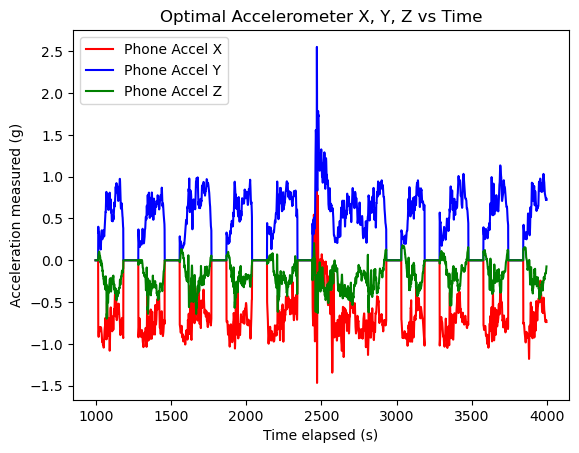

In [17]:
m1 = pd.read_csv("../Data split into strokes/Anthony_Optimal_Split.csv")

Splitcdate = m1["timekeeper"]

s1 = 1000
it = 3000

# print(m1)

SplitPhoneAccelZ = m1["Phone-Accel-Z"]
SplitPhoneAccelY = m1["Phone-Accel-Y"]
SplitPhoneAccelX = m1["Phone-Accel-X"]

plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelX[s1:s1+it], "-r", label="Phone Accel X") 
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelY[s1:s1+it], "-b", label="Phone Accel Y") 
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelZ[s1:s1+it], "-g", label="Phone Accel Z") 

plt.legend(loc="upper left")
plt.show()

11729
11729


ValueError: Length of values (11728) does not match length of index (11729)

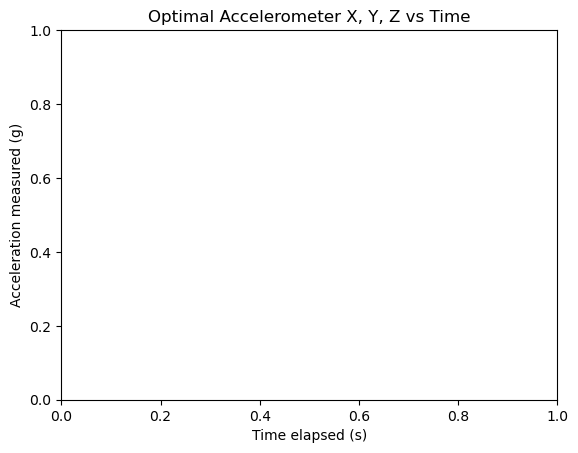

In [97]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")


print(m['Phone-Accel-X'].size)
print(m['Elapsed time (s)'].size)

# Phone-Accel-Z
m['y_p'] = np.diff(m['Phone-Accel-X']) / np.diff(m['Elapsed time (s)'])
print("worky")
m['x_p'] = (np.array(m['Elapsed time (s)'])[:-1] + np.array(m['Elapsed time (s)'])[1:]) / 2

plt.figure(1)
plt.plot(data['x'], data['y'], 'r')
plt.plot(data['x_p'], data['y_p'], 'b')
plt.show()

#plt.plot(cdate[startmark:startmark+tl], PhoneAccelX[startmark:startmark+tl], "-r", label="Phone Accel X") 
# plt.plot(cdate[startmark:startmark+tl], PhoneAccelY[startmark:startmark+tl], "-b", label="Phone Accel Y") 
# plt.plot(cdate[startmark:startmark+tl], PhoneAccelZ[startmark:startmark+tl], "-g", label="Phone Accel Z") 

# plt.legend(loc="upper left")
# plt.show()

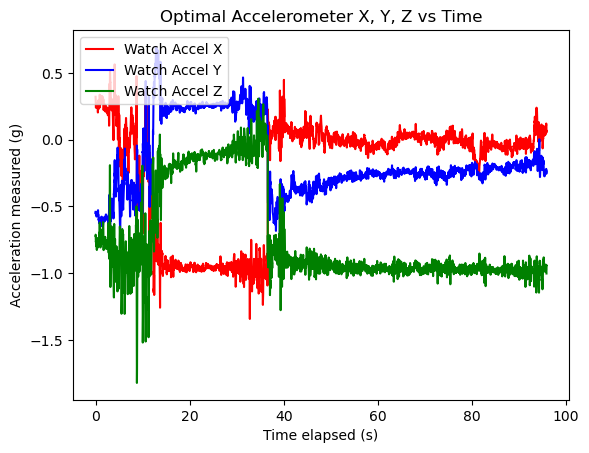

In [8]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchAccelX[startmark:endmark], "-r", label="Watch Accel X") 
plt.plot(cdate[startmark:endmark], WatchAccelY[startmark:endmark], "-b", label="Watch Accel Y") 
plt.plot(cdate[startmark:endmark], WatchAccelZ[startmark:endmark], "-g", label="Watch Accel Z") 

plt.legend(loc="upper left")
plt.show()


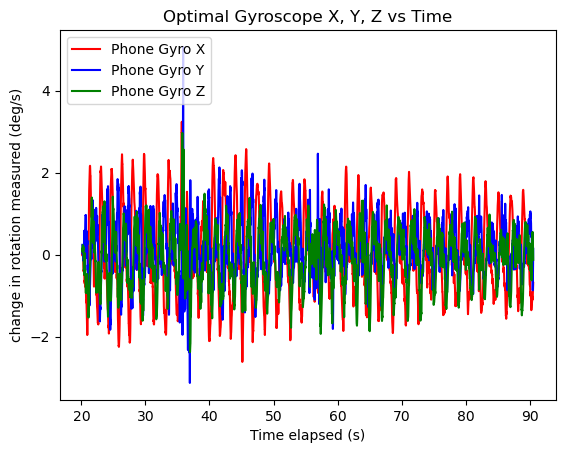

In [12]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("change in rotation measured (deg/s)")
plt.title("Optimal Gyroscope X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], PhoneGyroX[startmark:endmark], "-r", label="Phone Gyro X") 
plt.plot(cdate[startmark:endmark], PhoneGyroY[startmark:endmark], "-b", label="Phone Gyro Y") 
plt.plot(cdate[startmark:endmark], PhoneGyroZ[startmark:endmark], "-g", label="Phone Gyro Z") 

plt.legend(loc="upper left")
plt.show()



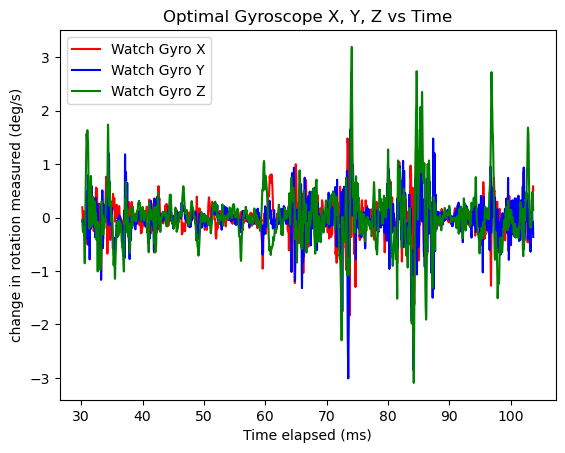

In [44]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("change in rotation measured (deg/s)")
plt.title("Optimal Gyroscope X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchGyroX[startmark:endmark], "-r", label="Watch Gyro X") 
plt.plot(cdate[startmark:endmark], WatchGyroY[startmark:endmark], "-b", label="Watch Gyro Y") 
plt.plot(cdate[startmark:endmark], WatchGyroZ[startmark:endmark], "-g", label="Watch Gyro Z") 

plt.legend(loc="upper left")
plt.show()

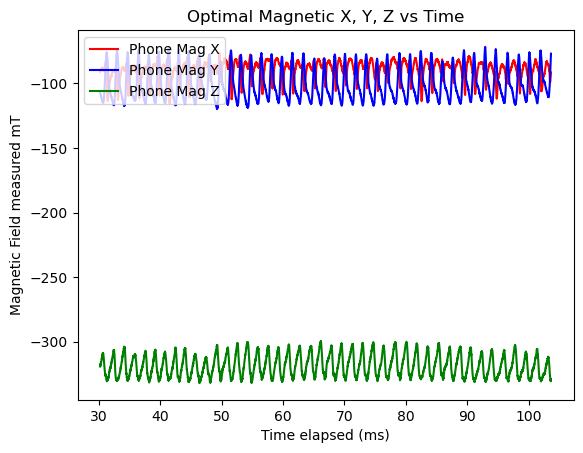

In [45]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Magnetic Field measured mT")
plt.title("Optimal Magnetic X, Y, Z vs Time")
plt.plot(cdate[v:endmark], PhoneMagX[startmark:endmark], "-r", label="Phone Mag X") 
plt.plot(cdate[startmark:endmark], PhoneMagY[startmark:endmark], "-b", label="Phone Mag Y") 
plt.plot(cdate[startmark:endmark], PhoneMagZ[startmark:endmark], "-g", label="Phone Mag Z") 

plt.legend(loc="upper left")
plt.show()

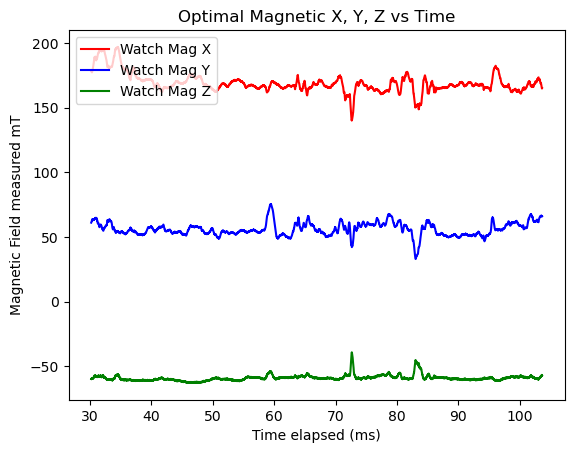

In [46]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Magnetic Field measured mT")
plt.title("Optimal Magnetic X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchMagX[startmark:endmark], "-r", label="Watch Mag X") 
plt.plot(cdate[startmark:endmark], WatchMagY[startmark:endmark], "-b", label="Watch Mag Y") 
plt.plot(cdate[startmark:endmark], WatchMagZ[startmark:endmark], "-g", label="Watch Mag Z") 

plt.legend(loc="upper left")
plt.show()

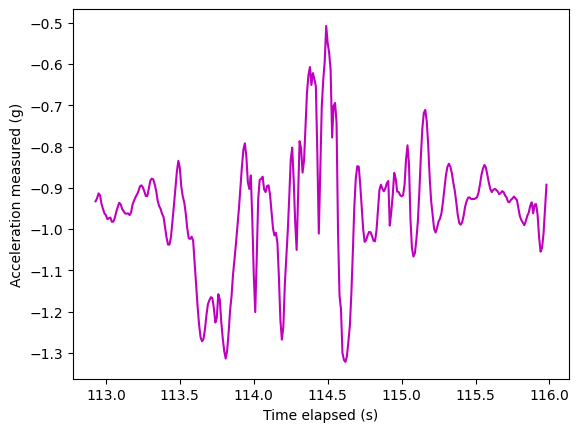

In [79]:
i = 0
# plt.title("Optimal Phone Accelerometer Y vs Time")
plt.xlabel("Time elapsed (s)")
plt.ylabel("Force measured (g)")
plt.plot(cdate[startmark:endmark], WatchAccelY[startmark:endmark], "-m") 

# plt.plot(cdate[startmark:endmark], PhoneAccelX[startmark:endmark]) 
# plt.plot(cdate[startmark:endmark], PhoneAccelY[startmark:endmark]) 
plt.show()

sleep(15)

foundthreshold = 0

while (i < len(cdate)):
    low = 0
#     if (cdate[i] > startmark and foundthreshold == 0):
#         foundthreshold = i
#         low = i
#     elif (cdate[i] > startmark):
#         low = foundthreshold
    
    if (i >= startmark):
        low = startmark
        if (i-low > 500):
            low = i-500
    
        
    plt.xlabel("Time elapsed (s)")
    plt.ylabel("Acceleration measured (g)")
    #plt.plot(cdate[low:i], WatchAccelX[low:i], "-b") 
    #plt.plot(cdate[low:i], PhoneAccelY[low:i], "-r") 
    #plt.plot(cdate[low:i], PhoneAccelZ[low:i], "-g") 
    plt.plot(cdate[low:i], WatchAccelZ[low:i], "-m") 


    plt.draw()
    plt.pause(0.1)
    clear_output(wait=True)
    i += 10